# Motivation

* Improving my pandas, viz, feature engineering skills

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement

* A retail company “ABC Private Limited” wants to understand the **customer purchase behaviour** (specifically, purchase amount) against various products of different categories. 
* They have shared **purchase summary of various customers** for selected high volume products from last month.
* The data set also contains **customer demographics** (age, gender, marital status, city_type, stay_in_current_city), **product details** (product_id and product category) and **Total purchase_amount** from last month.

* Now, they want to build a model to **predict the purchase amount of customer against various products** which will help them to create **personalized** **offer** for customers against different products.


In [3]:
train_df = pd.read_csv('../input/black-friday/train.csv')
train_df['set']='Train'
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,Train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,Train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,Train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,Train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,Train


In [4]:
test_df = pd.read_csv('../input/black-friday/test.csv')
test_df['set']='Test'
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,set
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,Test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,Test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,Test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,Test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,Test


In [5]:
combined_df = train_df.append(test_df)
combined_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Train


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  set                         783667 non-null  object 
dtypes: float64(3),

In [7]:
# Drop user id columns
combined_df.drop('User_ID', axis=1, inplace=True)
combined_df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Train
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Train
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Train
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Train
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Train
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,Train
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,Train
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0,Train
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0,Train
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0,Train


# Handling Categorical Features

### Categorical Fearure :  Gender

In [8]:
combined_df['Gender']=combined_df['Gender'].map({'F':0,'M':1})
combined_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,Train
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,Train
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,Train
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,Train
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,Train


### Categorical Fearure :  Age

In [9]:
# Get unique age bins
combined_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
# Should not use below not good practice
pd.get_dummies(combined_df['Age']).head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [11]:
#Let's do Label encoding
combined_df['Age'] = combined_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6, '55+':7})

In [12]:
# Could have use this for target encoding
# combined_df['Age'].value_counts()/combined_df.shape[0]

### Categorical Fearure :  City_category

In [13]:

df_city = pd.get_dummies(combined_df['City_Category'], drop_first=True)


In [14]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [15]:
# remove City category and add new dumy city categories to final dataframe
combined_df = pd.concat([combined_df, df_city],axis=1)
combined_df.drop('City_Category', axis=1, inplace=True)
combined_df.head()


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,Train,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,Train,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,Train,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,Train,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,Train,0,1


# Missing Value Analysis

In [16]:
combined_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
set                                0
B                                  0
C                                  0
dtype: int64

* We have lots of missing value in Product Category 2 and Product Category 3

In [17]:
combined_df['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [18]:
# replace product category2 and product cateogory 3  with Mode
combined_df['Product_Category_2'] = combined_df['Product_Category_2'].fillna(combined_df['Product_Category_2'].mode()[0])
combined_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,B,C
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,Train,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,Train,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,Train,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,Train,0,0
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,Train,0,1


In [19]:
combined_df['Product_Category_3'] = combined_df['Product_Category_3'].fillna(combined_df['Product_Category_3'].mode()[0])
combined_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,Train,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,Train,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,Train,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,Train,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,Train,0,1


In [20]:
combined_df['Stay_In_Current_City_Years'] = combined_df['Stay_In_Current_City_Years'].str.replace('+','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [21]:
combined_df['Stay_In_Current_City_Years']=combined_df['Stay_In_Current_City_Years'].astype(int)
combined_df['B']=combined_df['B'].astype(int)
combined_df['C']=combined_df['C'].astype(int)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  set                         783667 non-null  object 
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

## Relationship between Age and purchase based on gender

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

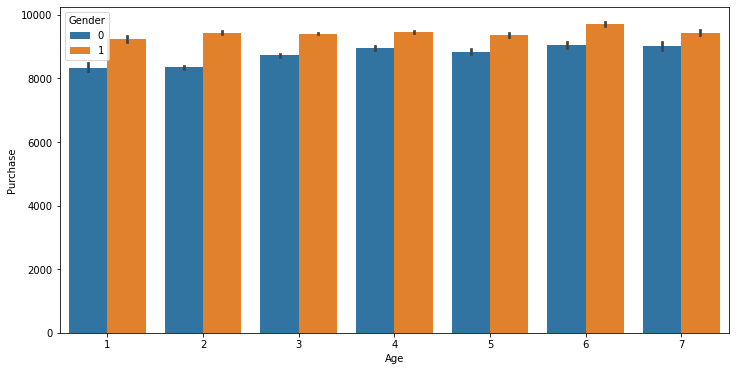

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot('Age','Purchase',hue='Gender', data=combined_df)

* we have fairly balanced purchase distribution among male and female for different age groups

## Relationship between Occupation and purchase based on gender

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

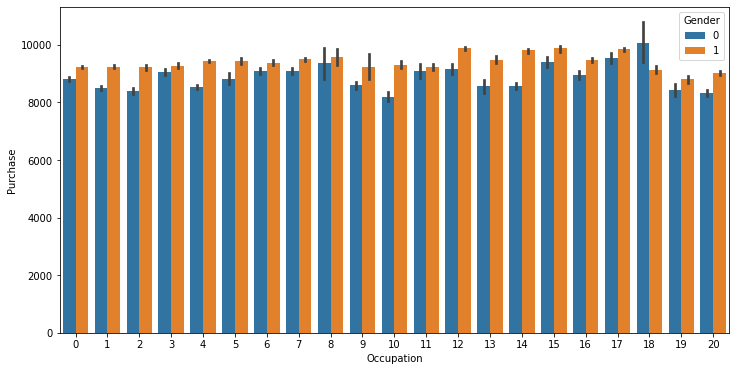

In [23]:
sns.barplot('Occupation','Purchase',hue='Gender', data=combined_df)

* we have fairly balanced purchase distribution among male and female for different occupations 

## Relationship between product categories and purchase based on gender

In [24]:
combined_df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'set', 'B',
       'C'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

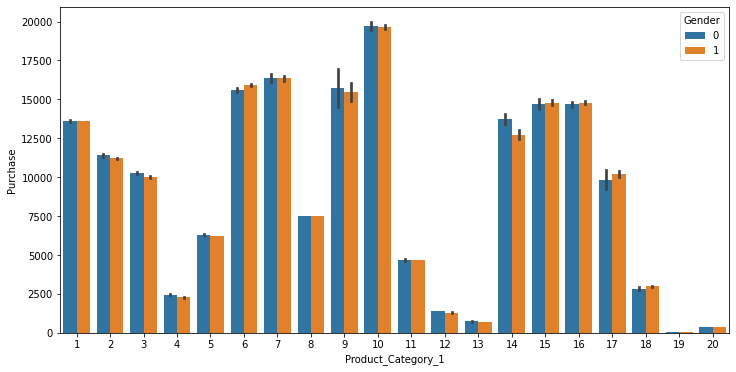

In [25]:
sns.barplot('Product_Category_1','Purchase',hue='Gender', data=combined_df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

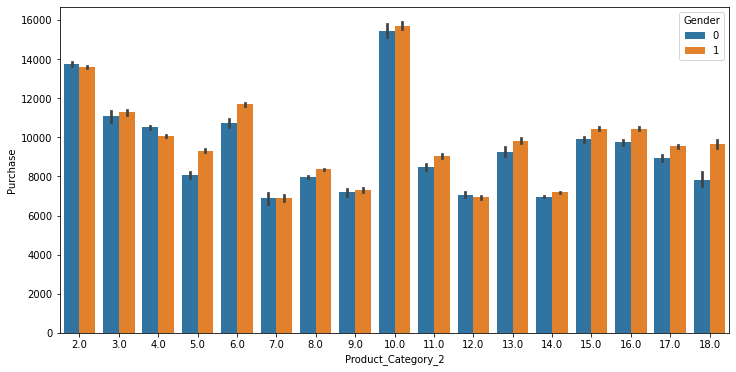

In [26]:
sns.barplot('Product_Category_2','Purchase',hue='Gender', data=combined_df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

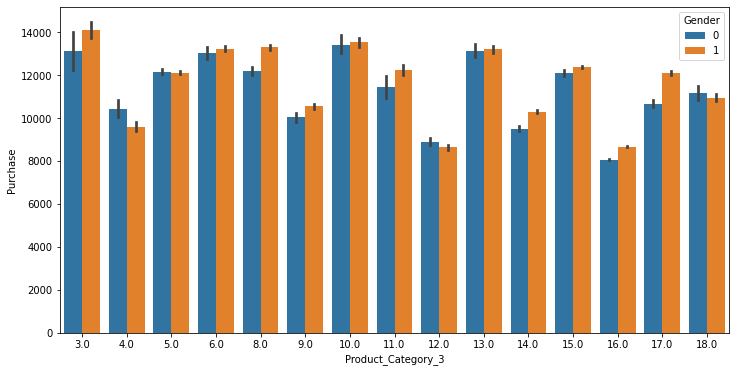

In [27]:
sns.barplot('Product_Category_3','Purchase',hue='Gender', data=combined_df)

## Feature Engineering, Feature Scaling

In [28]:
train_df = combined_df[combined_df['set']=='Train'].copy()
train_df.drop('set', axis=1, inplace=True)
train_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [29]:
test_df = combined_df[combined_df['set']=='Test'].copy()
test_df.drop('set', axis=1, inplace=True)
test_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [30]:
Y = train_df['Purchase']
X = train_df.drop('Purchase', axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
